In [6]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *
from utils import plot_function

matplotlib.rc('image', cmap='Greys')

In [7]:
path = untar_data(URLs.MNIST_SAMPLE)

In [8]:
path

Path('/home/jupyter/.fastai/data/mnist_sample')

In [9]:
Path.BASE_PATH = path

In [10]:
path.ls()

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

In [11]:
(path/'train').ls()
# Path is PosixPath object and / is overloaded to append to path more like path.join(a,b)

(#2) [Path('train/7'),Path('train/3')]

In [12]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()


In [13]:
im3 = Image.open(threes[3])

In [14]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 178],
       [  0,   0,   0,   0,   0, 186],
       [  0,   0,   0,   0,   0, 186],
       [  0,   0,   0,   0,   0,  39]], dtype=uint8)

In [15]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0, 178],
        [  0,   0,   0,   0,   0, 186],
        [  0,   0,   0,   0,   0, 186],
        [  0,   0,   0,   0,   0,  39]], dtype=torch.uint8)

In [16]:
tensor(im3).shape

torch.Size([28, 28])

In [17]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,104,253,253,253,255,253,253,253,218,32,0,0
2,0,0,0,0,0,178,248,252,252,252,253,252,252,252,252,215,34,0
3,0,0,0,0,0,186,252,252,252,252,253,252,252,252,252,252,79,0
4,0,0,0,0,0,186,252,243,172,172,39,39,39,219,252,252,79,0
5,0,0,0,0,0,39,53,47,0,0,0,29,117,244,252,252,79,0
6,0,0,0,0,0,0,0,0,0,0,54,208,252,252,252,184,21,0
7,0,0,0,0,0,0,0,0,3,41,253,252,252,252,206,21,0,0
8,0,0,0,0,0,0,5,41,165,252,253,252,252,252,227,131,9,0
9,0,0,0,0,0,109,163,252,252,252,253,252,252,252,252,252,156,0


In [18]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

In [19]:
len(seven_tensors), len(three_tensors)

(6265, 6131)

<AxesSubplot:>

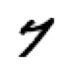

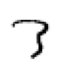

In [20]:
show_image(seven_tensors[1])
show_image(three_tensors[13])
# Show image is part of fastAI

In [21]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255

In [22]:
stacked_sevens.shape


torch.Size([6265, 28, 28])

In [23]:
# Rank 3 Tensor, has 3 axis.
# Axis is same has dimensions (pytorch is Axis)
# Shape is is the list containing the size of the axis

In [24]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)
# Take mean over Axis 0 (which is over all the images, back to 28x28 tensor)
mean3.shape

torch.Size([28, 28])

<AxesSubplot:>

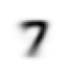

In [25]:
show_image(mean7)

<AxesSubplot:>

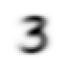

In [26]:
show_image(mean3)

<AxesSubplot:>

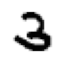

In [27]:
a_3 = stacked_threes[5]
show_image(a_3)

### L1 Norm : Mean absolute difference


In [28]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_abs

tensor(0.1700)

### L2 Norm: Root mean square error

In [29]:
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_sqr

tensor(0.3016)

In [30]:
def diffs(image, image_mean):
    l_1_norm = (image - image_mean).abs().mean()
    l_2_norm = ((image - image_mean)**2).mean().sqrt()
    return (l_1_norm, l_2_norm)

In [31]:
diffs(a_3, mean3)

(tensor(0.1700), tensor(0.3016))

In [32]:
diffs(a_3, mean7)

(tensor(0.2198), tensor(0.3829))

## Using PyTorch for L1 and L2 norm

In [33]:
F.l1_loss(a_3, mean3), F.mse_loss(a_3, mean3).sqrt()

(tensor(0.1700), tensor(0.3016))

## Validation

In [34]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls().sorted()])
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls().sorted()])

In [35]:
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = valid_7_tens.float()/225


In [36]:
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [37]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

In [38]:
mnist_distance(a_3, mean3)

tensor(0.1700)

In [39]:
mnist_distance(valid_3_tens, mean3).shape

torch.Size([1010])

In [40]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [41]:
is_3(stacked_sevens[0]), is_3(stacked_threes[0])

(tensor(False), tensor(True))

In [42]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = 1 - is_3(valid_7_tens).float().mean()
accuracy_3s, accuracy_7s

(tensor(0.9168), tensor(0.9864))

## SGD

In [43]:
def f(x): return x**2
## Example function


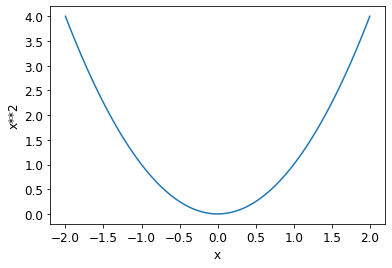

In [44]:
## FastAi method
plot_function(f, 'x', 'x**2')

In [45]:
def f_prime(x): return 2*x

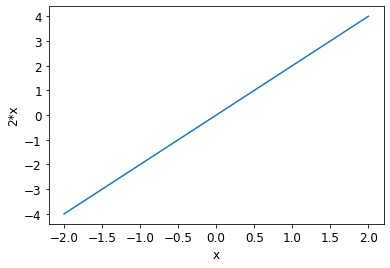

In [46]:
plot_function(f_prime, 'x', '2*x')

In [47]:
## Gradient
## _ at the end of method is inplace operation
## this method tells pytorch that we need to calculate
## gradient of this variable 
xt = tensor(3.).requires_grad_()

In [48]:
## here we pass xt (which is value 3 from above) to the
## square method and get back value 9, and it's gradient
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [49]:
## BACKWARD, back propogation, it's derevitive.
yt.backward()

In [50]:
## We got the gradient at x = 3 
xt.grad

tensor(6.)

### Rank 1 tensor

In [51]:
xt = tensor([3., 4., 10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [52]:
def f(x): return (x**2).sum()

In [53]:
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [54]:
## Call derivative
yt.backward()
## Get the new gradient
xt.grad

tensor([ 6.,  8., 20.])

## Stepping with learning rate

## End of end example of Grad Desc.

In [55]:
time = torch.arange(0, 20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [56]:
speed = torch.randn(20)*2 + 0.75*(time-9.5)**2 + 1

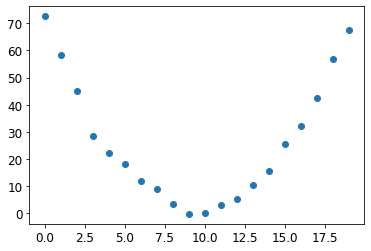

In [57]:
plt.scatter(time, speed)

In [58]:
## We assume that the relationship of time and speed 
## is Quadratic , thus in form of ax^2 + bx + c
## where x is time t
def f(t, params):
    a, b, c = params
    return a*(t**2) + (b*t) + c

In [59]:
## loss function
def mse(pred, target):
    return ((pred-target)**2).mean()

In [60]:
# Initialize random values for a,b,c
params = torch.randn(3).requires_grad_()

In [61]:
preds = f(time, params)

In [62]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)

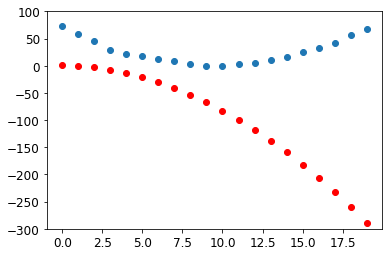

In [63]:
show_preds(preds)

In [64]:
loss = mse(preds, speed)
loss

tensor(25798.2539, grad_fn=<MeanBackward0>)

In [65]:
## Do the derivative
loss.backward()
## Plug in the params in the derivative of f
params.grad

tensor([-53193.9297,  -3418.8748,   -253.4585])

In [66]:
## pick a learning rate of 1e^-5 0.00001
lr = 1e-5


In [67]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [68]:
## Adjust the params now based on gradient and learning_rate
## use params.data not params directly otherwise it will
## calculate grad at that step.
params.data -= params.data - params.grad*lr
params.grad = None

In [69]:
preds = f(time, params)

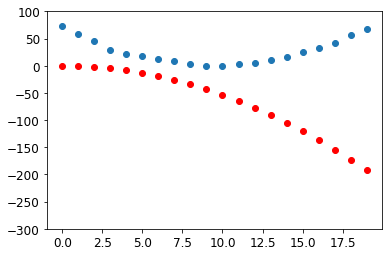

In [70]:
show_preds(preds)

In [71]:
mse(preds, speed)

tensor(13362.8652, grad_fn=<MeanBackward0>)

Loss has improved

In [72]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= params.grad.data * lr
    params.grad = None
    if prn: print(loss.item())
    return preds

In [73]:
#for i in range(10): apply_step(params)


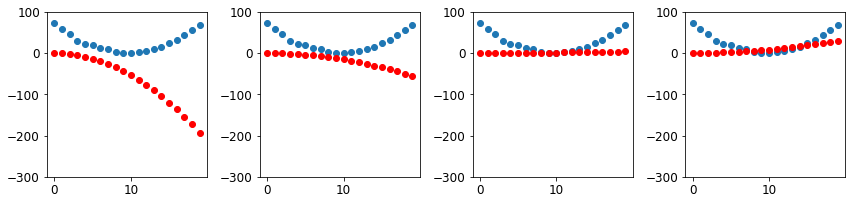

In [74]:
_, axs = plt.subplots(1,4, figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

## MNIST Loss

In [75]:
# Resize the stacked 3's and stacked 7's to a 2 dimension tensor 
# method view -1  means contain as many rows as needed to fit the data
# cat will just concatenate all the stacked 3's and 7's to one big list of matrices
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_x.shape

torch.Size([12396, 784])

In [76]:
# we need to label those rank 1 tensors, use 1 for threes and 0 for sevens,
# this is okay for now as we just have 2 digits
# The unsqueeze makes the vector to a matrix by adding an additional column of unit
# value.  
# We can't create a dataset without the second dimention, its needed to index
# the dataset 
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

In [77]:
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [78]:
dset = list(zip(train_x, train_y))
# Destructuing the tuple
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [79]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [80]:
def init_params(size, var=1.0): return (torch.randn(size)*var).requires_grad_()

In [81]:
# y = wx + b, lets initialize the w, weights
weights = init_params((28*28,1))

In [82]:
# y = wx + b, lets initialize the b, bias
bias = init_params(1)

In [83]:
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [84]:
train_x[0].shape

torch.Size([784])

In [85]:
weights.shape

torch.Size([784, 1])

In [86]:
weights[0]

tensor([1.3123], grad_fn=<SelectBackward0>)

In [87]:
weights.shape 

torch.Size([784, 1])

In [88]:
bias.shape

torch.Size([1])

In [89]:
# @ is matrix multiplication
def linear1(xb): return xb@weights + bias

In [90]:
preds = linear1(train_x)
preds.shape

torch.Size([12396, 1])

In [91]:
train_y.shape

torch.Size([12396, 1])

In [92]:
corrects = (preds > 0.0).float() == train_y
corrects.float().mean().item()

0.4912068545818329

In [93]:
## New loss function
# where operates over all elements of the tensor
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [94]:
def sigmoid(x): return 1/(1+torch.exp(-x))

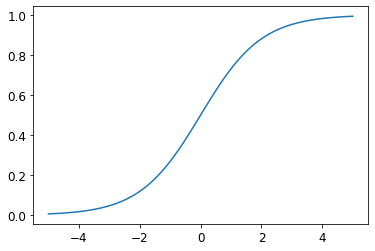

In [95]:
plot_function(sigmoid, min=-5, max=5)

In [96]:
def mnist_loss(predictions,targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean() 

## Mini Batch

In [97]:
weights = init_params((28*28,1))
bias = init_params(1)

In [98]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape,

(torch.Size([256, 784]), torch.Size([256, 1]))

In [99]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [100]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [101]:
# clear the grad of weight and bias after each run, otherwise it keeps adding grad
# to the previous value.
# weights.grad.zero_()
# bias.grad.zero_();

In [102]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [103]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5)==yb
    return correct.float().mean()

In [104]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [105]:
validate_epoch(linear1)

0.4752

In [106]:
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6596

In [107]:
for i in range(100):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8583 0.9194 0.9384 0.9482 0.957 0.9609 0.9638 0.9653 0.9682 0.9687 0.9697 0.9702 0.9716 0.9706 0.9711 0.9711 0.9716 0.9716 0.9721 0.9726 0.9736 0.9731 0.9731 0.9741 0.9745 0.9751 0.9755 0.977 0.9775 0.9785 0.979 0.979 0.979 0.9795 0.9795 0.9795 0.9795 0.98 0.98 0.9804 0.9809 0.98 0.98 0.98 0.98 0.98 0.98 0.9804 0.9809 0.9809 0.9814 0.9814 0.9814 0.9814 0.9814 0.9819 0.9819 0.9819 0.9819 0.9819 0.9819 0.9824 0.9824 0.9824 0.9824 0.9829 0.9829 0.9829 0.9829 0.9829 0.9829 0.9829 0.9829 0.9829 0.9829 0.9829 0.9829 0.9829 0.9829 0.9834 0.9834 0.9839 0.9844 0.9844 0.9844 0.9844 0.9844 0.9844 0.9844 0.9844 0.9844 0.9844 0.9844 0.9848 0.9848 0.9853 0.9853 0.9853 0.9853 0.9853 

# Optimizer

In [108]:
lr = 0.5

In [109]:
linear_model = nn.Linear(28*28, 1)

In [110]:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [111]:
class BasicOptim:
    def __init__(self, params, lr): self.params, self.lr = list(params), lr
    
    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr
    
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad.zero_()

In [112]:
opt = BasicOptim(linear_model.parameters(), lr)

In [113]:
# New Train Epoch
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()
        

In [114]:
validate_epoch(linear_model)

0.2636

In [115]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [116]:
train_model(linear_model, 50)

0.5132 0.8247 0.9131 0.9365 0.9497 0.9604 0.9653 0.9678 0.9692 0.9702 0.9721 0.9741 0.9751 0.9756 0.9765 0.977 0.977 0.9775 0.9775 0.9785 0.979 0.9795 0.9795 0.9804 0.9809 0.9809 0.9809 0.9814 0.9814 0.9814 0.9819 0.9824 0.9824 0.9814 0.9814 0.9819 0.9819 0.9819 0.9819 0.9824 0.9824 0.9829 0.9829 0.9829 0.9829 0.9829 0.9829 0.9829 0.9829 0.9829 

## SGD FastAI

In [117]:
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.5244 0.8345 0.9146 0.9375 0.9521 0.9619 0.9658 0.9678 0.9692 0.9707 0.9726 0.9736 0.9746 0.9761 0.9761 0.9765 0.977 0.977 0.977 0.9775 

In [118]:
dls = DataLoaders(dl, valid_dl)

In [119]:
learn = Learner(dls, nn.Linear(28*28, 1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [120]:
learn.fit(20, lr=0.5)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.177566,0.412059,0.514720,00:00
1,0.078277,0.199104,0.825810,00:00
2,0.046431,0.111860,0.912659,00:00
3,0.034276,0.078923,0.936212,00:00
4,0.028867,0.062285,0.950932,00:00
5,0.026116,0.052423,0.960255,00:00
6,0.024489,0.046056,0.965653,00:00
7,0.023368,0.041670,0.968106,00:00
8,0.022507,0.038478,0.969087,00:00
9,0.021801,0.036052,0.969578,00:00


## NN 

In [121]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [122]:
w1 = init_params((28*28, 30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

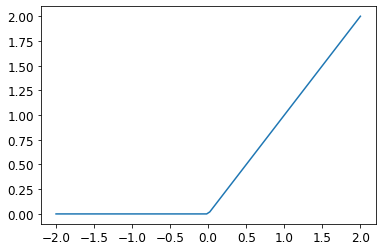

In [123]:
# The res.max((tensor(0.0)) is rectified linear unit relu)
plot_function(F.relu)

In [124]:
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

In [125]:
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [126]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.313281,0.400986,0.504907,00:00
1,0.145349,0.233043,0.801276,00:00
2,0.081081,0.117432,0.910206,00:00
3,0.053586,0.079024,0.938175,00:00
4,0.040761,0.061451,0.954367,00:00
5,0.034170,0.051569,0.964671,00:00
6,0.030359,0.045340,0.966143,00:00
7,0.027869,0.041096,0.967125,00:00
8,0.026069,0.038015,0.968106,00:00
9,0.024674,0.035669,0.968106,00:00


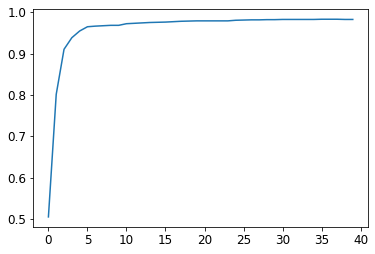

In [127]:
# Recorder records all the values appearing in the table above. we get the values and do itemgot(2) to get the batch_accuracy. Itemgot is from L class.
plt.plot(L(learn.recorder.values).itemgot(2));

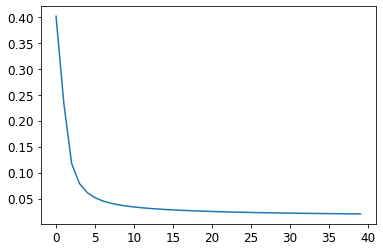

In [128]:
# Loss
plt.plot(L(learn.recorder.values).itemgot(1));

In [129]:
learn.model

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [130]:
# Looking into our model,
m = learn.model
w,b = m[0].parameters()
w.shape

torch.Size([30, 784])

In [136]:
# The weights parameters
#w[0].view(28,28)

<AxesSubplot:>

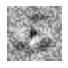

In [139]:
show_image(w[1].view(28,28))

In [133]:
# We see what is happening here, the parameters show the image they are trying to find

### Everything together

In [134]:
dls = ImageDataLoaders.from_folder(path)

In [140]:
learn = cnn_learner(dls, resnet18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(2,0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.270136,0.075170,0.986752,00:08
1,0.026929,0.005702,0.998037,00:08
